Node (0, 0): English, Dutch
Node (0, 1): 
Node (0, 2): Polish, Czech, Slovakian, Croatian
Node (0, 3): 
Node (1, 0): Norwegian, Swedish, Danish
Node (1, 1): German
Node (1, 2): Finnish, Estonian
Node (1, 3): 
Node (2, 0): 
Node (2, 1): 
Node (2, 2): Hungarian
Node (2, 3): 
Node (3, 0): Portuguese, French, Spanish, Italian
Node (3, 1): 
Node (3, 2): 
Node (3, 3): 


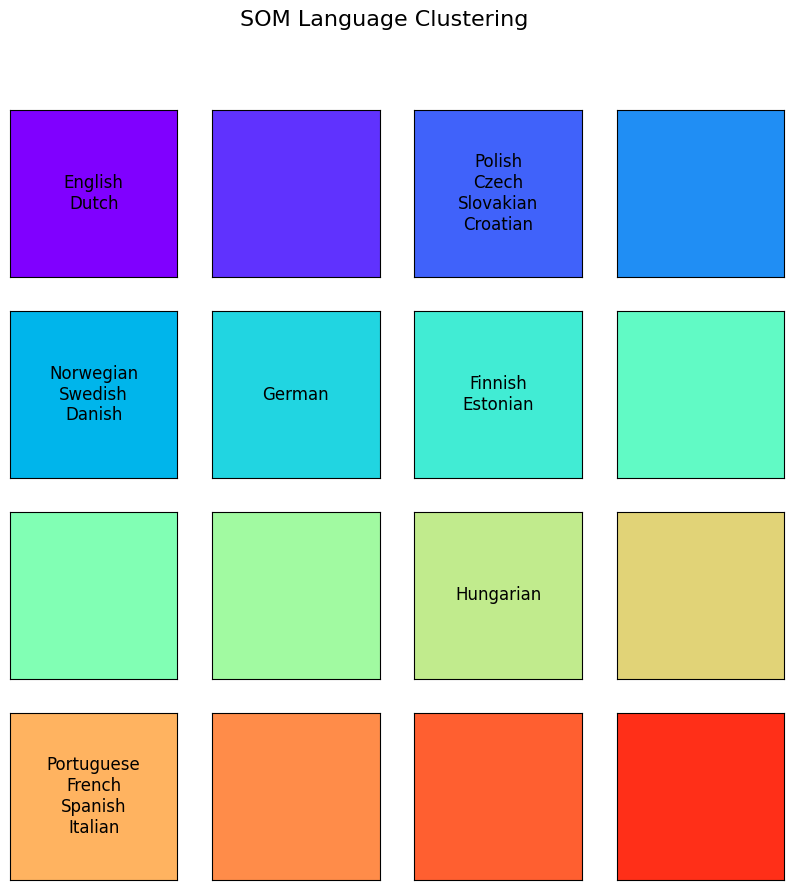

In [73]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import os
import pandas as pd
from minisom import MiniSom

# Load data
dir_path = os.getcwd()
data_path = os.path.join(dir_path, '..', 'data', 'euro_lang.csv')
data = pd.read_csv(data_path)
data_np = data.values.T  # Transpose for SOM

# Define languages
languages = list(data.columns)

# Train SOM
som = MiniSom(4, 4, data_np.shape[1], sigma=1, learning_rate=0.5)
som.train_batch(data_np, num_iteration=70)


# Visualization
fig = plt.figure(figsize=(10, 10))
the_grid = GridSpec(4, 4)

for position in range(4 * 4):
    row, col = position // 4, position % 4
    ax = plt.subplot(the_grid[row, col], aspect=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_facecolor(plt.cm.Blues(position / 16))  # Improved colormap

    # Get labels for the current node
    winning_labels = [
        languages[i]
        for i in range(len(data_np))
        if som.winner(data_np[i]) == (row, col)
    ]

    # Display labels in the node
    ax.text(
        0.5, 0.5, "\n".join(winning_labels),
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=12,
        color='black'
    )
    ax.set_facecolor(plt.cm.rainbow(position / 16))


for position in range(4 * 4):
    row, col = position // 4, position % 4
    labels = [
        languages[i]
        for i in range(len(data_np))
        if som.winner(data_np[i]) == (row, col)
    ]
    print(f"Node ({row}, {col}): {', '.join(labels)}")

# Add title
plt.suptitle('SOM Language Clustering', fontsize=16)
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

# Function to generate synthetic data
def generate_data(n_samples=30, noise_std=0.1, seed=42):
    np.random.seed(seed)
    x = np.sort(np.random.uniform(0, 1, n_samples))
    noise = np.random.normal(0, noise_std, n_samples)
    y = np.sin(2 * np.pi * x) ** 2 + noise
    return x, y

# Function to implement RBF network
def rbf_network(x_train, y_train, x_test, n_units, gamma=1.0):
    # Step 1: Select RBF centers using KMeans
    kmeans = KMeans(n_clusters=n_units, random_state=42).fit(x_train.reshape(-1, 1))
    centers = kmeans.cluster_centers_
    
    # Step 2: Compute RBF kernel (Gaussian RBFs)
    Phi_train = rbf_kernel(x_train.reshape(-1, 1), centers, gamma=gamma)
    Phi_test = rbf_kernel(x_test.reshape(-1, 1), centers, gamma=gamma)
    
    # Step 3: Train weights using pseudo-inverse
    weights = np.linalg.pinv(Phi_train).dot(y_train)
    
    # Step 4: Predict on test data
    y_pred = Phi_test.dot(weights)
    return y_pred, centers

# Function to visualize results
def visualize_rbf_models(x_train, y_train, x_test, y_true, hidden_units):
    plt.figure(figsize=(14, 10))
    for i, n_units in enumerate(hidden_units):
        y_pred, centers = rbf_network(x_train, y_train, x_test, n_units)
        plt.subplot(2, 3, i + 1)
        plt.scatter(x_train, y_train, label="Training Data")
        plt.plot(x_test, y_true, label="True Function", linestyle="dashed")
        plt.plot(x_test, y_pred, label=f"RBF Model with {n_units} Units")
        plt.title(f"RBF Model with {n_units} Units")
        plt.legend()
        plt.xlabel("x")
        plt.ylabel("y")
    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    # Generate synthetic data
    x_train, y_train = generate_data()
    x_test = np.linspace(0, 1, 100)
    y_true = np.sin(2 * np.pi * x_test) ** 2
    
    # Define number of hidden units to test
    hidden_units = [2, 5, 10, 15, 20, 25]
    
    # Visualize RBF models with different numbers of hidden units
    visualize_rbf_models(x_train, y_train, x_test, y_true, hidden_units)

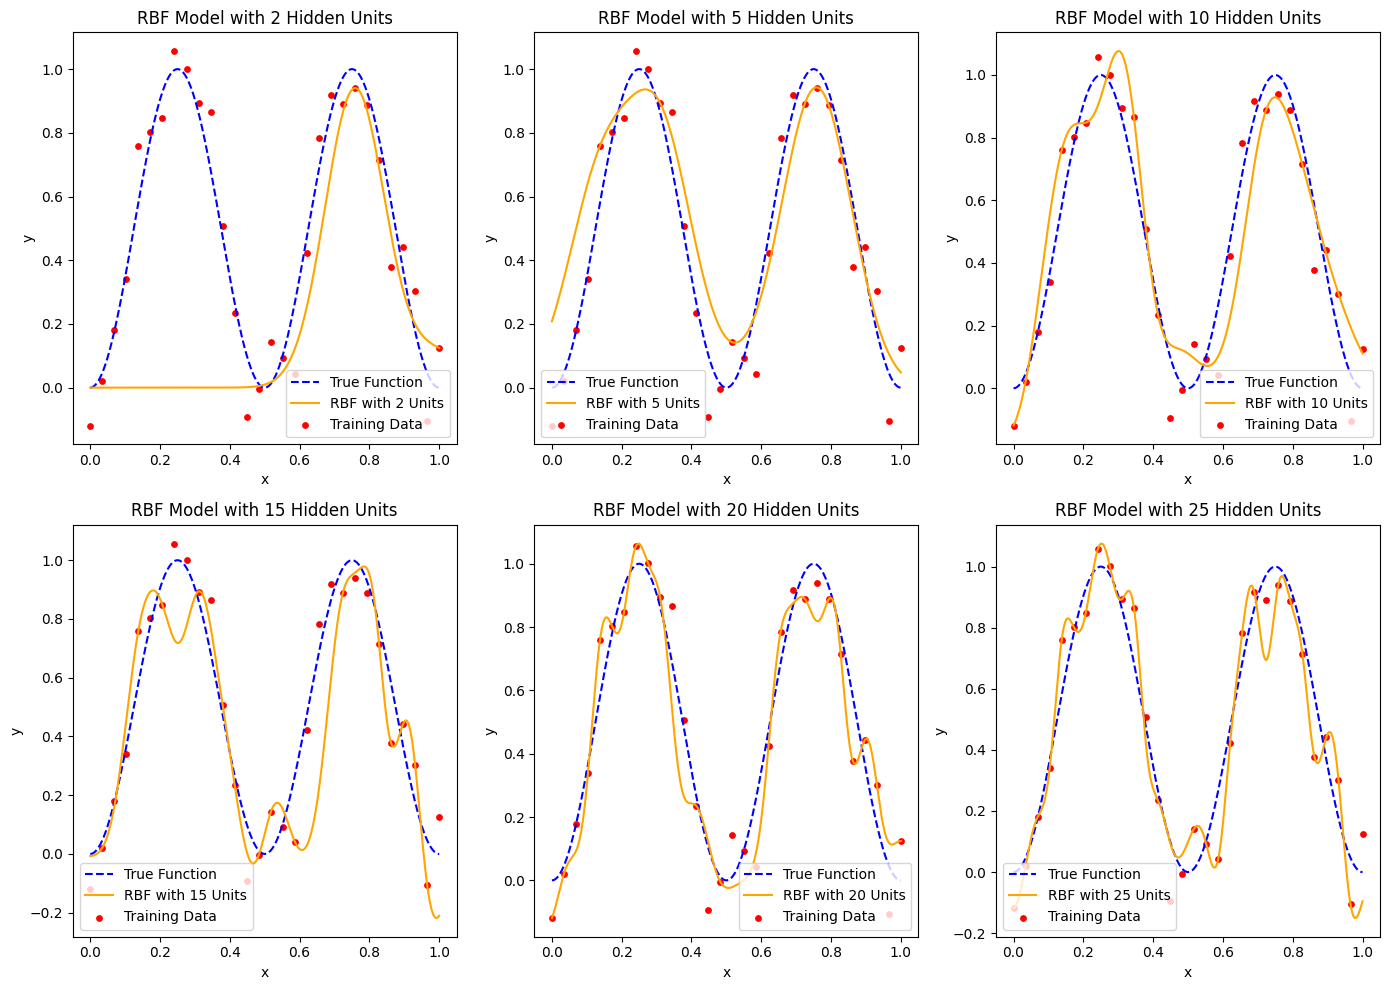

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# Function to generate synthetic data
def generate_data():
    x = np.linspace(0, 1, 30)
    y = np.sin(2 * np.pi * x) ** 2 + np.random.normal(0, 0.1, len(x))
    return x, y

# Train RBF models with different numbers of hidden units
def train_rbf(x, y, hidden_units):
    rbf_models = {}
    for m in hidden_units:
        centroid_indices = np.random.choice(len(x), m, replace=False)
        centroids = x[centroid_indices]
        model = Rbf(centroids, y[centroid_indices], function="gaussian")
        rbf_models[m] = model
    return rbf_models

# Plot RBF models in subplots
def plot_rbf_subplots(rbf_models, x, y):
    x_test = np.linspace(0, 1, 1000)
    true_function = np.sin(2 * np.pi * x_test) ** 2

    plt.figure(figsize=(14, 10))
    for i, (m, model) in enumerate(rbf_models.items()):
        predictions = model(x_test)
        plt.subplot(2, 3, i + 1)
        plt.plot(x_test, true_function, color="blue", label="True Function", linestyle="--")
        plt.plot(x_test, predictions, color="orange", label=f"RBF with {m} Units")
        plt.scatter(x, y, color="red", label="Training Data", s=15)
        plt.title(f"RBF Model with {m} Hidden Units")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    hidden_units = [2, 5, 10, 15, 20, 25]
    x, y = generate_data()
    rbf_models = train_rbf(x, y, hidden_units)
    plot_rbf_subplots(rbf_models, x, y)

/Users/williamchang/Desktop/-Courses/predicitve-learning/hw/hw3/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


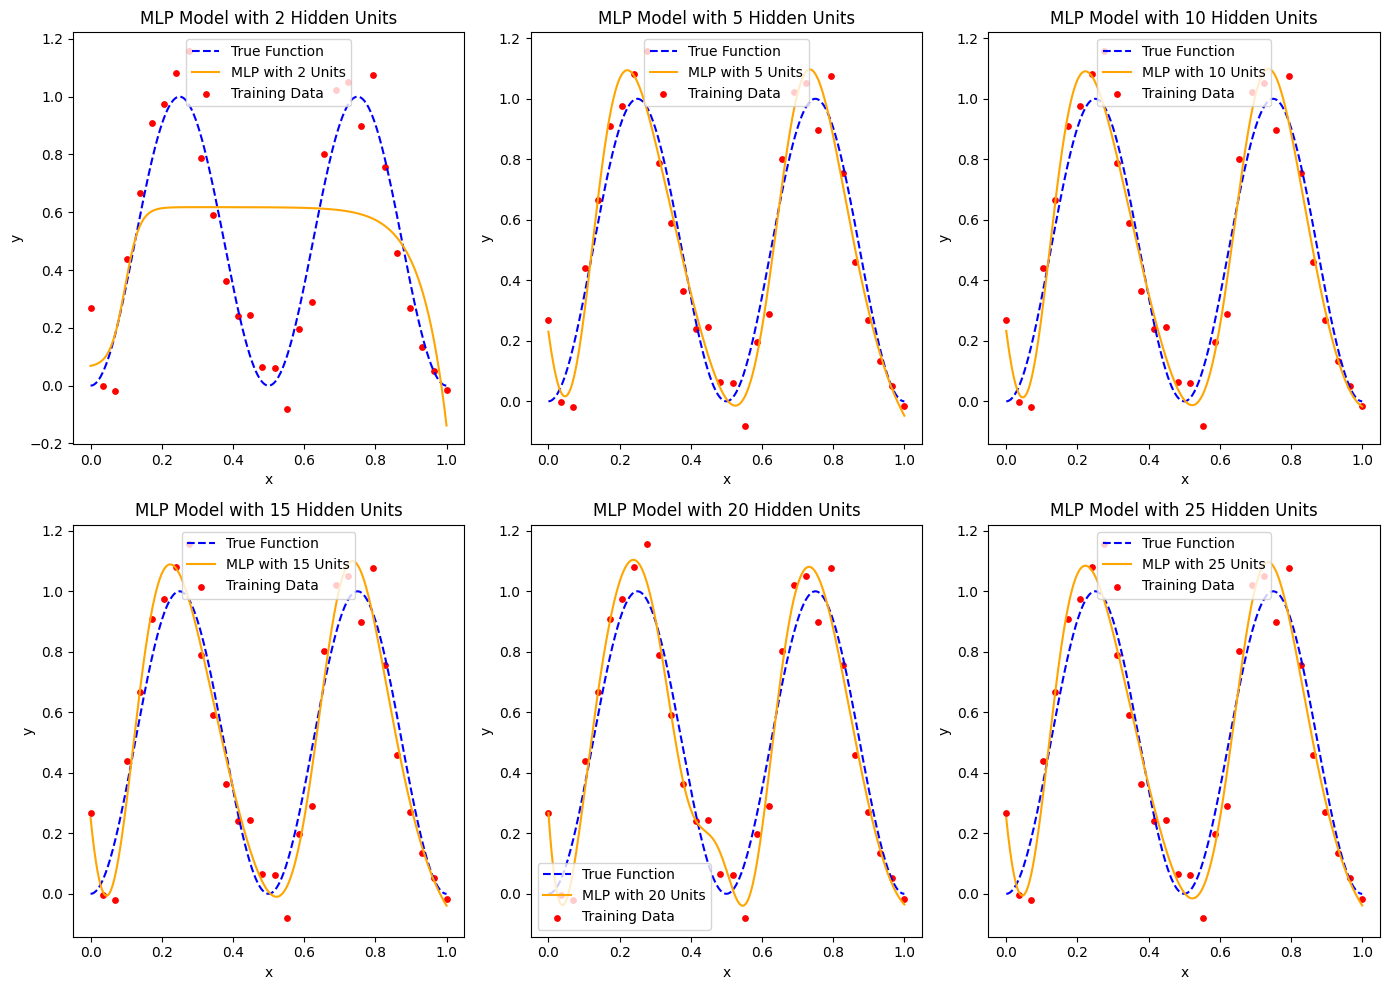

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Function to generate synthetic data
def generate_data():
    x = np.linspace(0, 1, 30)
    y = np.sin(2 * np.pi * x) ** 2 + np.random.normal(0, 0.1, len(x))
    return x, y

# Train MLP models with different numbers of hidden units
def train_mlp(x, y, hidden_units):
    mlp_models = {}
    for m in hidden_units:
        mlp = MLPRegressor(
            hidden_layer_sizes=(m,),
            activation="tanh",
            solver="lbfgs",
            max_iter=1000,  # Adjusted max_iter for convergence
            random_state=42
        )
        mlp.fit(x.reshape(-1, 1), y)
        mlp_models[m] = mlp
    return mlp_models

# Plot MLP models in subplots
def plot_mlp_subplots(mlp_models, x, y):
    x_test = np.linspace(0, 1, 1000).reshape(-1, 1)
    true_function = np.sin(2 * np.pi * x_test) ** 2

    plt.figure(figsize=(14, 10))
    for i, (m, model) in enumerate(mlp_models.items()):
        predictions = model.predict(x_test)
        plt.subplot(2, 3, i + 1)
        plt.plot(x_test, true_function, color="blue", label="True Function", linestyle="--")
        plt.plot(x_test, predictions, color="orange", label=f"MLP with {m} Units")
        plt.scatter(x, y, color="red", label="Training Data", s=15)
        plt.title(f"MLP Model with {m} Hidden Units")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    hidden_units = [2, 5, 10, 15, 20, 25]
    x, y = generate_data()
    mlp_models = train_mlp(x, y, hidden_units)
    plot_mlp_subplots(mlp_models, x, y)